# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [5]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [8]:
print(train_images.shape)
print(test_images.shape)
np.unique(train_labels)

(60000, 28, 28)
(10000, 28, 28)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

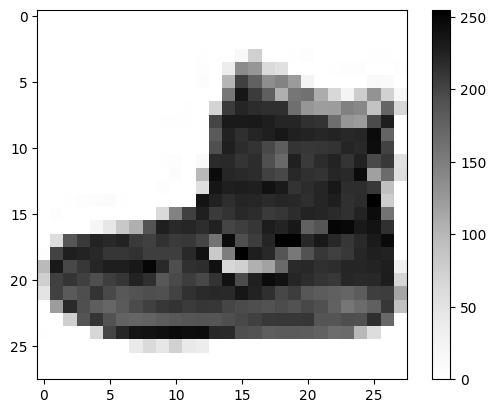

In [9]:
plt.figure()
plt.imshow(train_images[0], cmap = "Greys")
plt.colorbar()
plt.grid(False)
plt.show()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

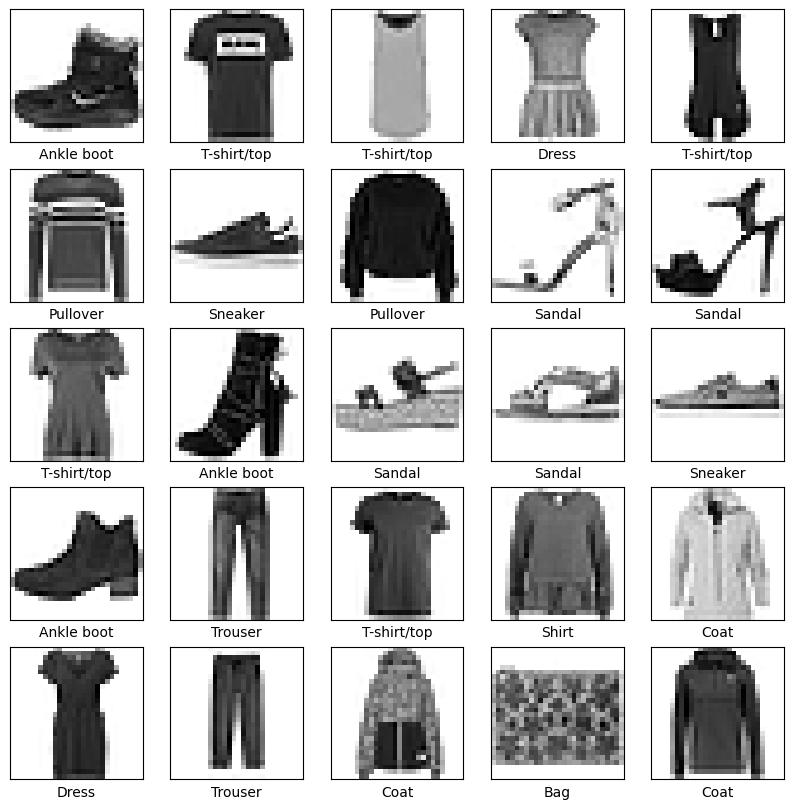

In [11]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [12]:
'''
La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional
(de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo.
Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`.
Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas).
La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1.
Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
'''
A medida que el modelo entrena, la perdida y la exactitud son desplegadas.
Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.
'''
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5205 - accuracy: 0.8158 - val_loss: 0.4154 - val_accuracy: 0.8513
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3877 - accuracy: 0.8614 - val_loss: 0.3695 - val_accuracy: 0.8684
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3460 - accuracy: 0.8751 - val_loss: 0.3704 - val_accuracy: 0.8687
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3195 - accuracy: 0.8841 - val_loss: 0.3451 - val_accuracy: 0.8770
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3008 - accuracy: 0.8888 - val_loss: 0.3250 - val_accuracy: 0.8835
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2852 - accuracy: 0.8925 - val_loss: 0.3249 - val_accuracy: 0.8835
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.8978 - val_loss: 0.3415 - val_accuracy:

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [16]:
'''
Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento.
Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste).
Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo,
que nunca antes ha visto comparado con el de entrenamiento.
'''

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3468 - accuracy: 0.8822 - 431ms/epoch - 1ms/step

Test accuracy: 0.8822000026702881


In [17]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.520536,0.815771,0.415437,0.851333
1,0.387718,0.861375,0.369508,0.868417
2,0.346003,0.875146,0.370395,0.868750
3,0.319489,0.884083,0.345113,0.877000
4,0.300785,0.888792,0.324951,0.883500
5,0.285192,0.892542,0.324896,0.883500
6,0.272500,0.897771,0.341503,0.875500
7,0.260568,0.902625,0.310764,0.887500
8,0.250078,0.905937,0.338063,0.879583
9,0.241680,0.908104,0.315584,0.889667


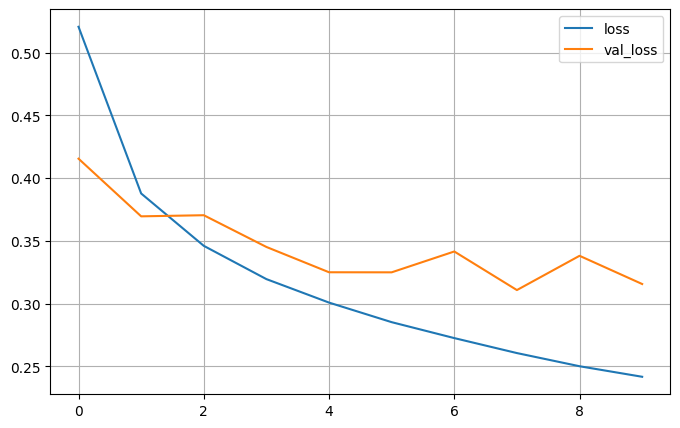

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

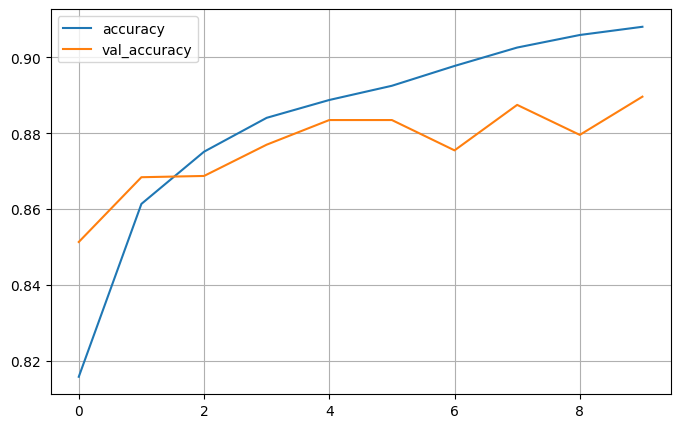

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 941us/step


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [21]:
predictions[0]

array([1.1981667e-06, 8.9495941e-08, 6.1933882e-08, 1.6548224e-09,
       3.7397513e-08, 2.3902064e-04, 2.6276502e-06, 4.5388718e-03,
       5.4172970e-06, 9.9521255e-01], dtype=float32)

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [22]:
np.argmax(predictions[0])

9

In [23]:
predictions[0].argmax()

9

In [24]:
np.argmax(predictions[1])

2

In [25]:
np.argmax(predictions[2])

1

In [26]:
np.argmax(predictions[3])

1

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [27]:
test_labels[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

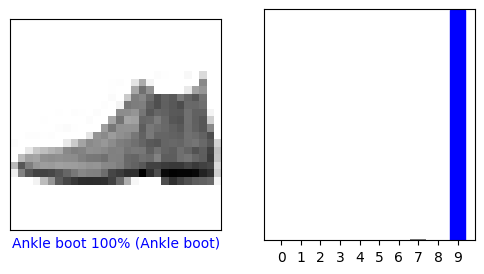

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

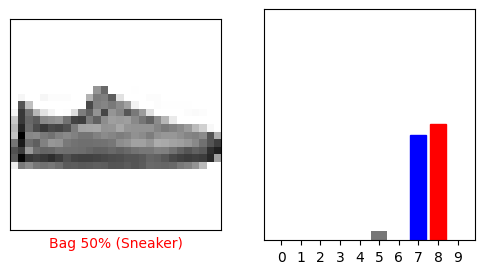

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

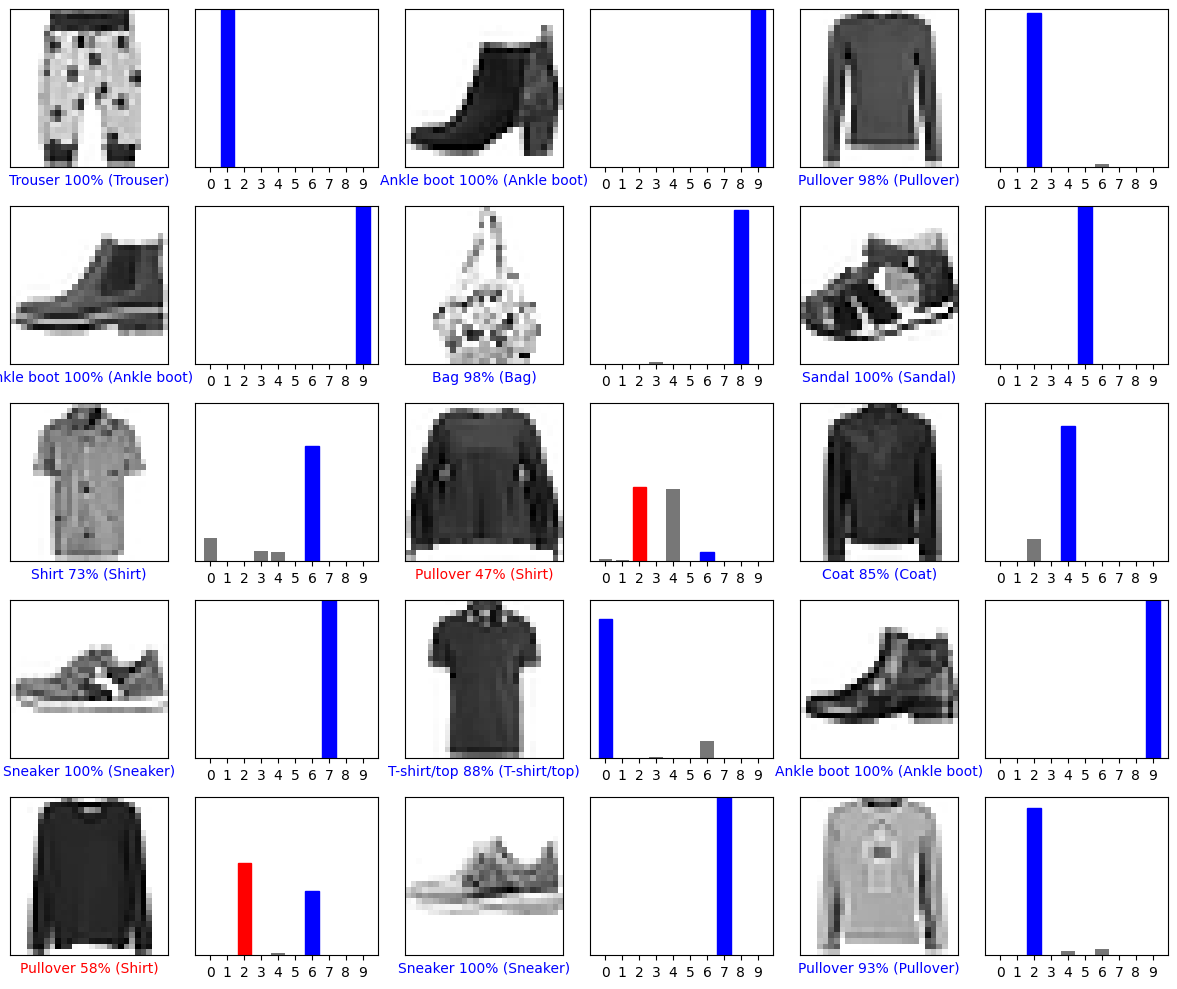

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i, j in enumerate(np.random.randint(0, 10000, (15,))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(j, predictions[j], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [34]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[6.6182452e-07 4.1661721e-13 9.9796730e-01 6.1616940e-12 1.7295330e-03
  5.4454781e-13 3.0255015e-04 4.3015753e-18 3.7095207e-10 1.9303290e-15]]


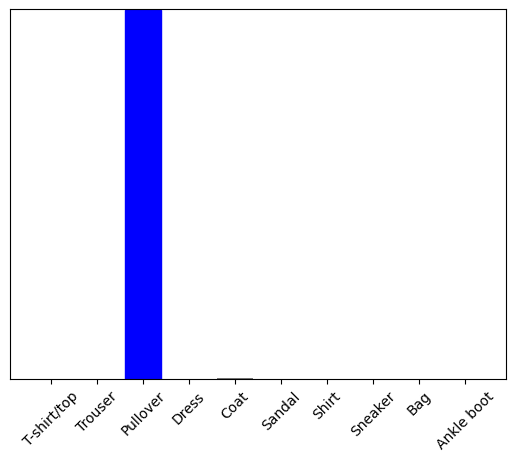

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [36]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.

Analicemos ahora el resultado con más detalle, más allá de la precisión (accuracy), lo que conviene en cualquier tipo de ejercicio de clasificación
Para ello, primero obtenemos las clases predichas a partir de las probabilidades de salida.

In [37]:
predictions.shape

(10000, 10)

In [43]:
predictions_lab = np.argmax(predictions, axis=1)

In [39]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

MATRIZ DE CONFUSION

In [40]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=test_labels, y_pred=predictions_lab)

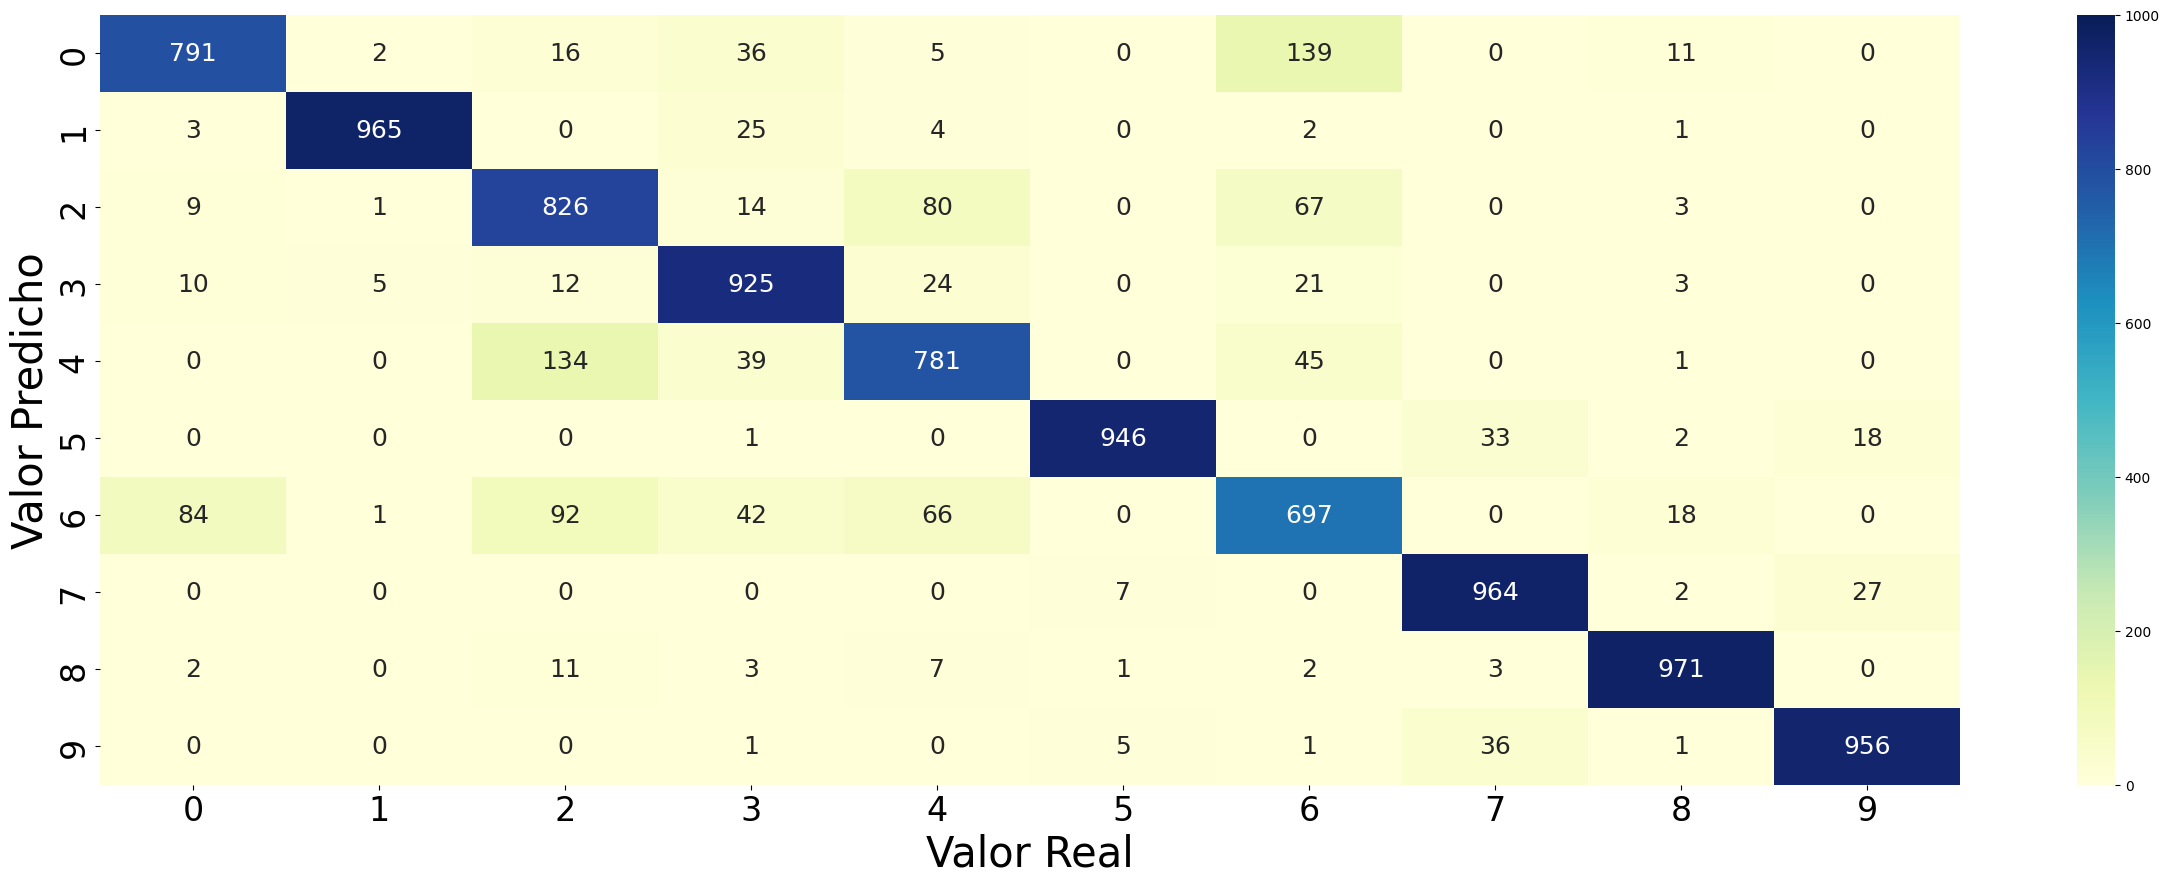

In [42]:
import seaborn as sns
plt.figure(figsize=(30, 10))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 18}, fmt='.0f', vmin=0, vmax=1000, cmap='YlGnBu')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.xlabel('Valor Real', fontsize=30)
plt.ylabel('Valor Predicho', fontsize=30);

INFORME DE METRICAS


In [44]:
from sklearn.metrics import classification_report

informe = classification_report(test_labels, predictions_lab, target_names= class_names)

In [45]:
print(informe)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.79      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.76      0.83      0.79      1000
       Dress       0.85      0.93      0.89      1000
        Coat       0.81      0.78      0.79      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.72      0.70      0.71      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [50]:
err_test_2_4 = test_images[(test_labels == 2)&(predictions_lab == 4)]
test_labels_2_4 = test_labels[(test_labels == 2)&(predictions_lab == 4)]
predictions_2_4 = predictions[(test_labels == 2)&(predictions_lab == 4)]
err_test_4_2 = test_images[(test_labels == 4)&(predictions_lab == 2)]
# err_test_4 = test_images[test_labels == 4]

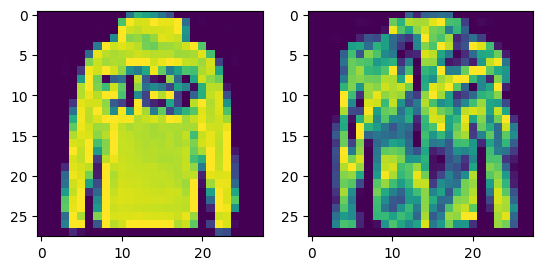

In [52]:
plt.subplot(1, 2, 1)
plt.imshow(err_test_2_4[0])

plt.subplot(1, 2, 2)
plt.imshow(err_test_4_2[0])

In [53]:
def plot_wrong(true_label, pred_label):
  err_test_2_4 = test_images[(test_labels == true_label)&(predictions_lab == pred_label)]
  test_labels_2_4 = test_labels[(test_labels == true_label)&(predictions_lab == pred_label)]
  predictions_2_4 = predictions[(test_labels == true_label)&(predictions_lab == pred_label)]

  # Plot the first X test images, their predicted labels, and the true labels.
  # Color correct predictions in blue and incorrect predictions in red.
  num_rows = 5
  num_cols = 3
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))

  for i, j in enumerate(np.random.randint(0, len(test_labels_2_4), (num_images,))):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(j, predictions_2_4[j], test_labels_2_4, err_test_2_4)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(j, predictions_2_4[j], test_labels_2_4)
  plt.tight_layout()
  plt.show()

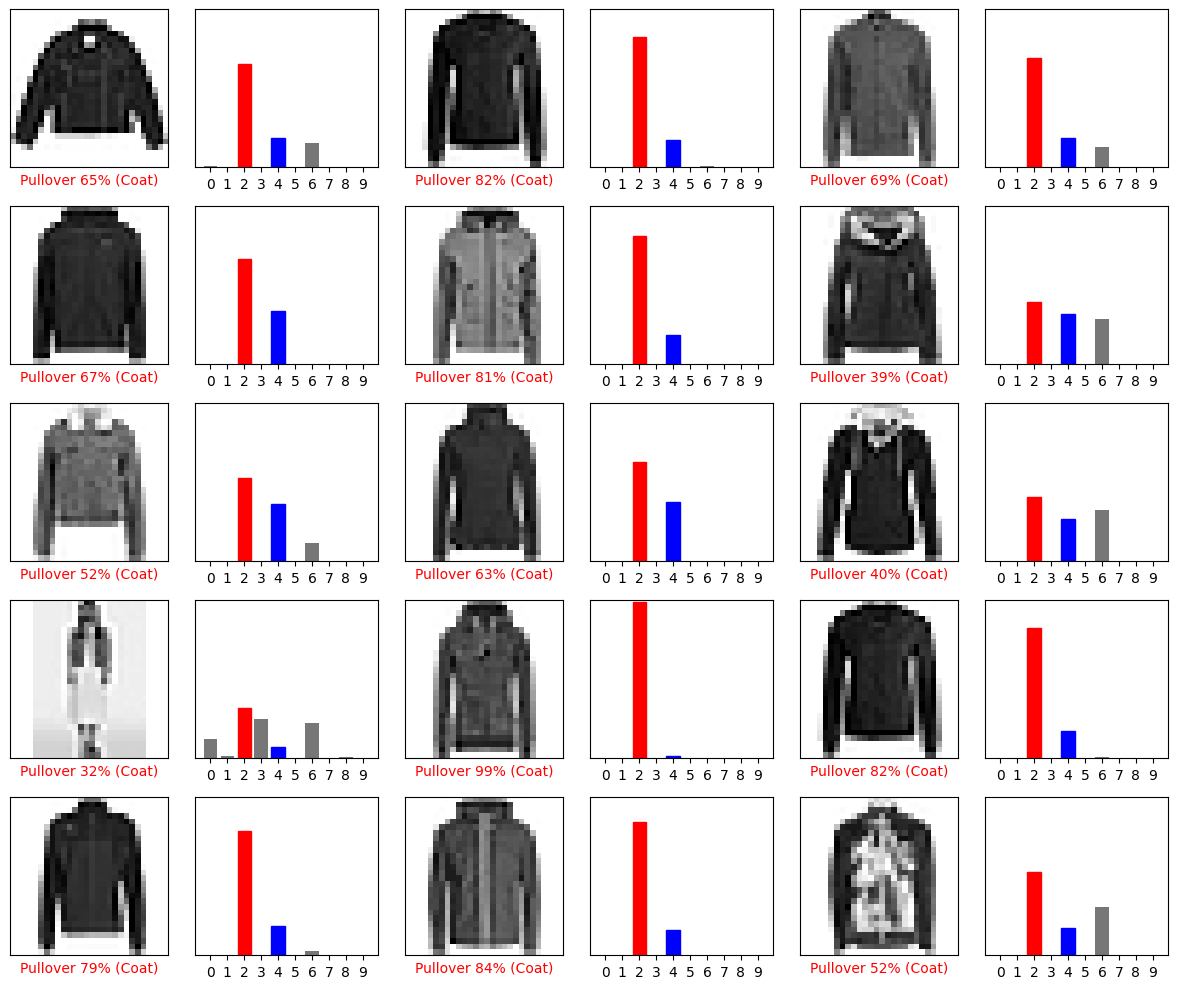

In [54]:
plot_wrong(4, 2)

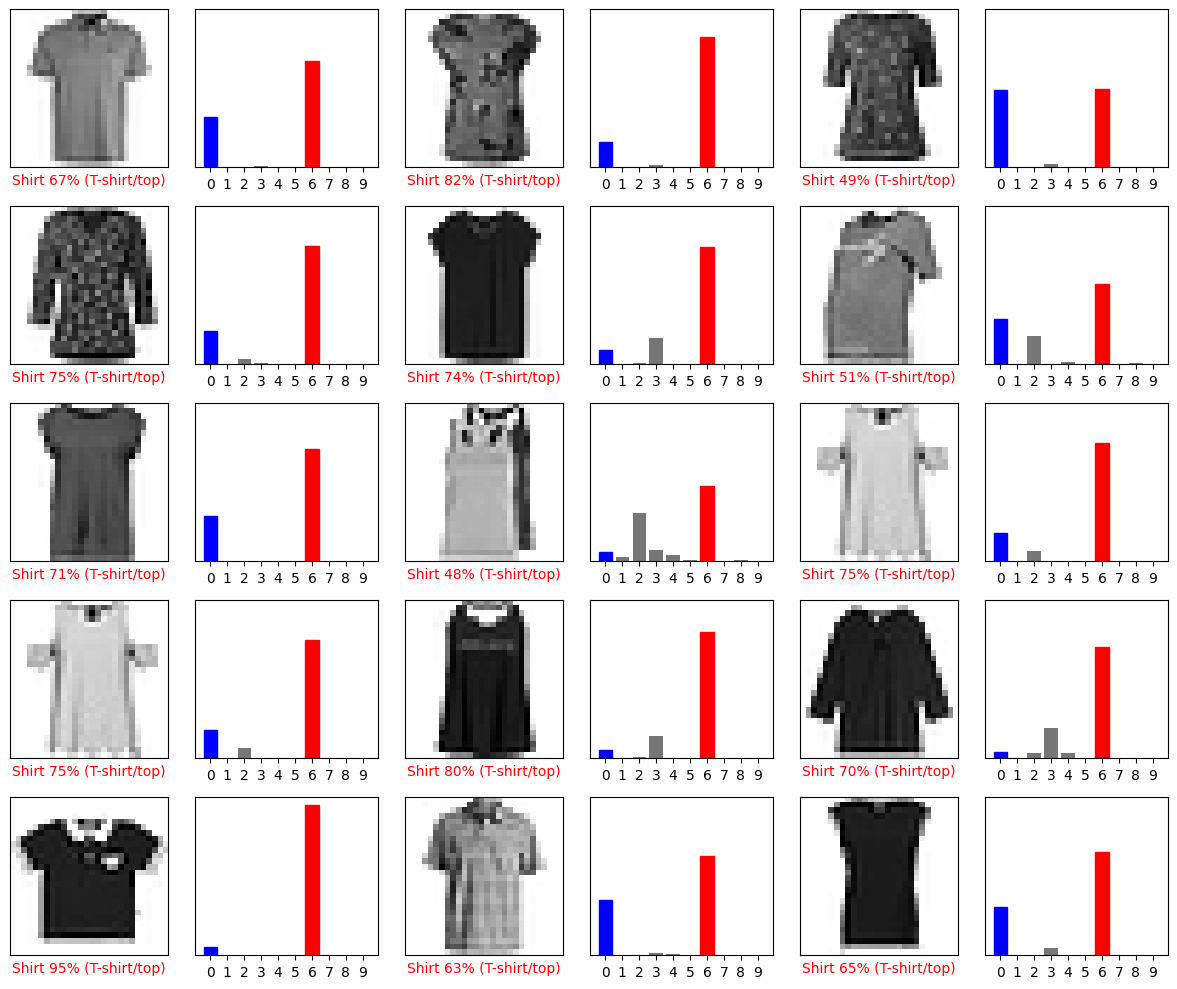

In [55]:
plot_wrong(0, 6)